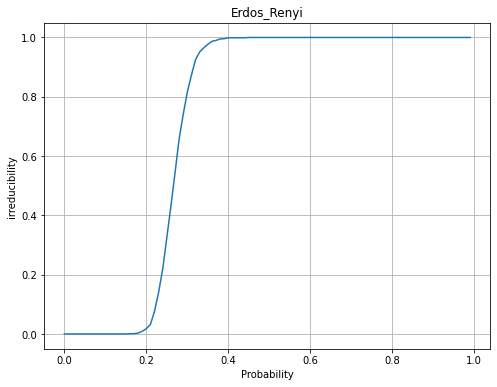

In [3]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt


def simulation(network):
    p = 0
    my_list = []
    my_reduced_list = []

    while p < 1:
        is_reduced = 0
        for j in nx.edges(network):
            if random.random() < p:
                network.remove_edge(j[0], j[1])

        matrix = nx.adjacency_matrix(network).todense()
        if np.allclose(matrix, np.tril(matrix)) \
                or np.allclose(matrix, np.triu(matrix)) \
                or np.allclose(matrix,np.diag(matrix)):
            is_reduced += 1

        my_reduced_list.append(is_reduced)
        my_list.append(p)
        p += 0.01

    return [my_list, my_reduced_list]


def plot(p_list, is_reduced_list_p, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(p_list, is_reduced_list_p)
    plt.title(title)
    plt.ylabel('irreducibility')
    plt.xlabel('Probability')
    ax.grid()
    # plt.savefig('./phase1/1/' + title + '.png')
    plt.show()


number_of_nodes = 20
p_graph = 0.2
deg = 10
number_of_simulations = 1000


def erdos_renyi_test(number_of_node, probability_of_edge, number_of_simulation):
    erdos_network = nx.erdos_renyi_graph(number_of_node, probability_of_edge)
    [p_list, is_reduced_list_sum] = simulation(erdos_network)
    for i in range(1, number_of_simulation):
        erdos_network = nx.erdos_renyi_graph(number_of_node, probability_of_edge)
        [p_list, is_reduced_list] = simulation(erdos_network)
        is_reduced_list_sum = np.add(is_reduced_list, is_reduced_list_sum)
    return p_list,(is_reduced_list_sum / number_of_simulation)


p_list , p1_list =erdos_renyi_test(number_of_nodes, p_graph, number_of_simulations)
plot(p_list,(p1_list), 'Erdos_Renyi')

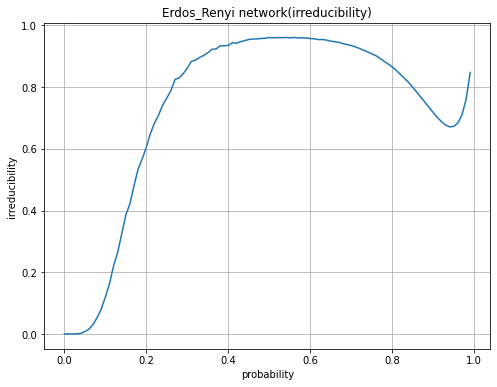

In [2]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

number_of_nodes = 20
p_graph = 0.2
deg = 10
number_of_simulations = 1000

def calculation_eq3(nos):
    # print("calculation")
    p = 0
    p_list = []
    res_list = []

    while p < 1:
        prob_e = 0
        p_list.append(p)
        for i in range(nos):
            network = nx.erdos_renyi_graph(number_of_nodes, p)
            prob_e += eq3(network, p)

        res_list.append((prob_e / nos))
        p += 0.01
    # while_end

    return [p_list, res_list]


def eq3(network, p):
    # print('eq3 ', p)
    p_ki = 0
    for i in network.degree():
        p_ki += p ** i[1]

    prob = (p - 1) * p_ki
    prob_e = np.exp(prob)

    # print(prob_e)
    return prob_e


def plot_irreducibility(my_list, out_list, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(my_list, out_list)
    plt.title(title + ' network(irreducibility)')
    plt.ylabel('irreducibility')
    plt.xlabel('probability')
    ax.grid()
    # plt.savefig('phase1/2/3/' + title + '.png')
    plt.show()

[e_list, eq3_list] = calculation_eq3(number_of_simulations)
plot_irreducibility(e_list, eq3_list, 'Erdos_Renyi')


calculation_eq6  0
calculation_eq6  0.01
calculation_eq6  0.02
calculation_eq6  0.03
calculation_eq6  0.04
calculation_eq6  0.05
calculation_eq6  0.060000000000000005
calculation_eq6  0.07
calculation_eq6  0.08
calculation_eq6  0.09
calculation_eq6  0.09999999999999999
calculation_eq6  0.10999999999999999
calculation_eq6  0.11999999999999998
calculation_eq6  0.12999999999999998
calculation_eq6  0.13999999999999999
calculation_eq6  0.15
calculation_eq6  0.16
calculation_eq6  0.17
calculation_eq6  0.18000000000000002
calculation_eq6  0.19000000000000003
calculation_eq6  0.20000000000000004
calculation_eq6  0.21000000000000005
calculation_eq6  0.22000000000000006
calculation_eq6  0.23000000000000007
calculation_eq6  0.24000000000000007
calculation_eq6  0.25000000000000006
calculation_eq6  0.26000000000000006
calculation_eq6  0.2700000000000001
calculation_eq6  0.2800000000000001
calculation_eq6  0.2900000000000001
calculation_eq6  0.3000000000000001
calculation_eq6  0.3100000000000001
cal

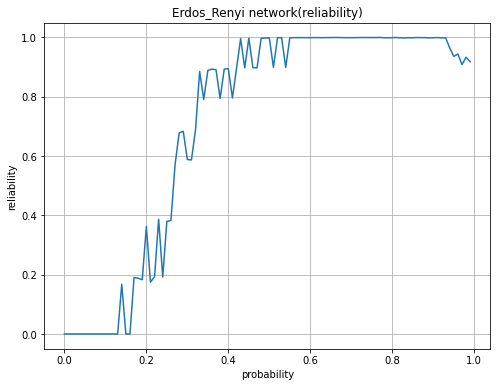

In [9]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

number_of_nodes = 20
p_graph = 0.2
deg = 10
number_of_simulations = 100

def calculation_eq6(nos):
    # print("calculation")
    p = 0
    p_list = []
    res_list = []

    while p < 1:
        print('calculation_eq6 ', p)
        out_g = 0
        p_list.append(p)
        if p>0.6:
          for i in range(nos):
              network = nx.erdos_renyi_graph(number_of_nodes, p)
              out_g += eq6(network, p)
          res_list.append(out_g / nos)
        else:
          for i in range(nos):
              network = nx.erdos_renyi_graph(number_of_nodes, p)
              out_g += eq6(network, p)
          res_list.append(out_g / nos)
        p += 0.01
        # while_end

    return [p_list, res_list]


def eq6(network, p):
    # print('eq6 ', p)
    out_g = 0

    if not nx.is_connected(network):
        return 0

    non = network.number_of_nodes()
    for j in range(0, non + 1):
        cut = 0
        for n in list(nx.all_node_cuts(network)):
            if len(n) == j:
                cut += 1

        out_g += cut * (p ** j) * ((1 - p) ** (non - j))

    # print(out_g)
    return 1 - out_g


def plot_reliability(my_list, out_list, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(my_list, out_list)
    plt.title(title + ' network(reliability)')
    plt.ylabel('reliability')
    plt.xlabel('probability')
    ax.grid()
    # plt.savefig('phase1/2/6/' + title + '.png')
    plt.show()

[e_list, eq6_list] = calculation_eq6(number_of_simulations)
plot_reliability(e_list, eq6_list, 'Erdos_Renyi')

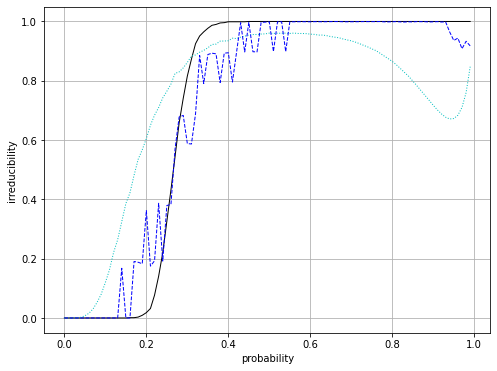

In [11]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
# plt.plot(my_list, out_list)
ax.plot(p_list, p1_list, linewidth=1, color='k')
ax.plot(e_list, eq3_list, linewidth=1, color='c', linestyle='dotted')
ax.plot(e_list, eq6_list, linewidth=1, color='b', linestyle='dashed')

# plt.title(title + 'Comparing')
plt.ylabel('irreducibility')
plt.xlabel('probability')
ax.grid()
# plt.savefig('phase1/2/3/' + title + '.png')
plt.show()